In [1]:
from sklearn import preprocessing
import pickle
import pkg_resources
from skimage import feature, color, filters, morphology, segmentation
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
dirpath = pkg_resources.resource_filename('core_photo_force', 'data')

turk_dir = []
objects = []

with (open(dirpath + '/' + 'turk_file6506_round2_sed_structs.pkl', "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break
with (open(dirpath + '/' + 'turk_file6506.pkl', "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break
# with (open(dirpath + '/' + 'turk_file6406.pkl', "rb")) as openfile:
#     while True:
#         try:
#             objects.append(pickle.load(openfile))
#         except EOFError:
#             break
with (open(dirpath + '/' + 'turk_file6507.pkl', "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break
print(objects[0])

defaultdict(<class 'list'>, {'img_Sample': [array([[[123, 121, 126],
        [ 69,  67,  72],
        [ 52,  51,  56],
        ..., 
        [176, 180, 181],
        [172, 176, 177],
        [173, 174, 176]],

       [[131, 129, 134],
        [ 70,  68,  73],
        [ 42,  41,  46],
        ..., 
        [178, 182, 183],
        [176, 180, 181],
        [174, 178, 179]],

       [[128, 127, 132],
        [ 73,  71,  76],
        [ 50,  49,  54],
        ..., 
        [173, 177, 178],
        [178, 182, 183],
        [176, 180, 181]],

       ..., 
       [[181, 192, 196],
        [182, 193, 197],
        [183, 194, 198],
        ..., 
        [176, 181, 184],
        [176, 181, 184],
        [174, 179, 182]],

       [[178, 189, 193],
        [180, 191, 195],
        [181, 192, 196],
        ..., 
        [179, 184, 187],
        [176, 181, 184],
        [174, 179, 182]],

       [[177, 186, 191],
        [178, 187, 192],
        [179, 188, 193],
        ..., 
        [179, 184, 187],

Sum Red
18190
Sum Green
17998
Sum Blue
17665
summed luminance
14473.526489
Sobel V sum
-17.929822549
Sobel H sum
4.85310117647
max h edge count
103
max v edge count
35
Gabor kernal
20.895281181


Dilated Vert Image
6935
Dilated Horz Image
6440
Segment Count
28


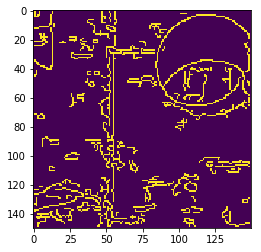

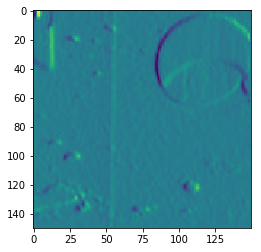

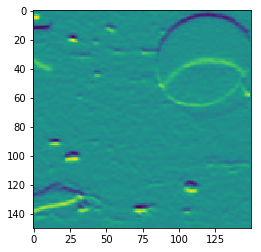

(150, 150)


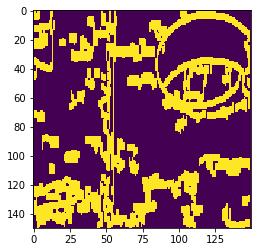

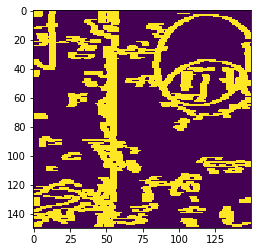

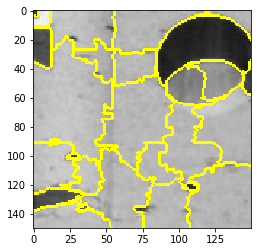

Sum Red
17659
Sum Green
19356
Sum Blue
18826
summed luminance
4428.04390941
Sobel V sum
-25.2548104902
Sobel H sum
42.9751408824
max h edge count
46
max v edge count
60
Gabor kernal
6.53279802123


Dilated Vert Image
11213
Dilated Horz Image
8378
Segment Count
30


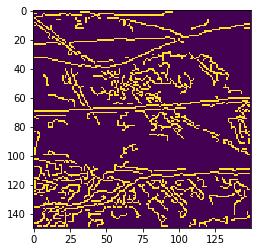

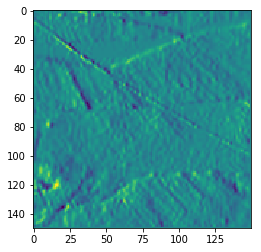

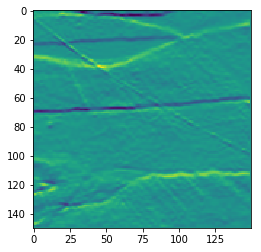

(150, 150)


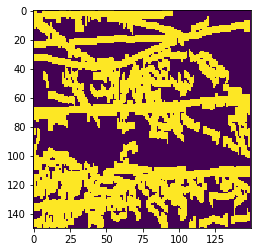

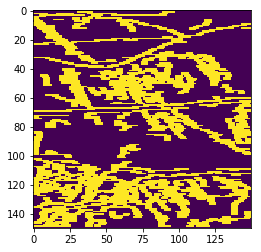

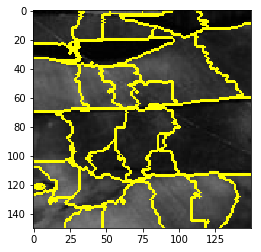

Sum Red
19383
Sum Green
19710
Sum Blue
18750
summed luminance
10182.2042122
Sobel V sum
3.50360598039
Sobel H sum
-12.1109457843
max h edge count
41
max v edge count
56
Gabor kernal
14.7061464527


Dilated Vert Image
10244
Dilated Horz Image
7129
Segment Count
30


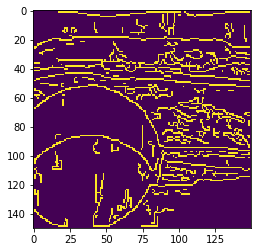

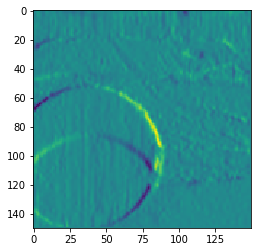

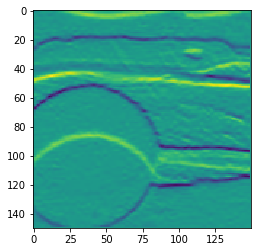

(150, 150)


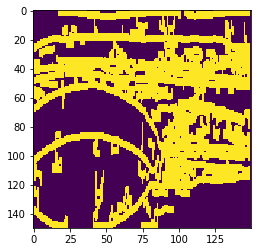

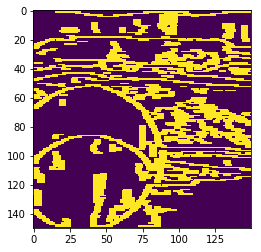

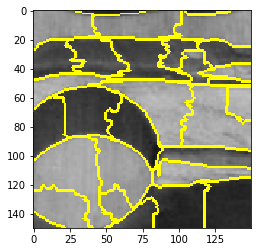

Sum Red
18314
Sum Green
18731
Sum Blue
19868
summed luminance
13563.8277537
Sobel V sum
-26.6820508824
Sobel H sum
-9.9816677451
max h edge count
39
max v edge count
51
Gabor kernal
19.7663832804


Dilated Vert Image
8943
Dilated Horz Image
8564
Segment Count
22


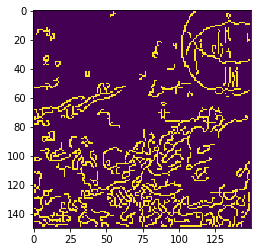

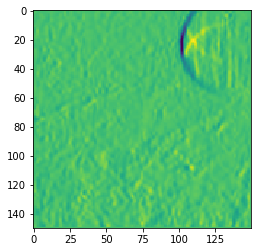

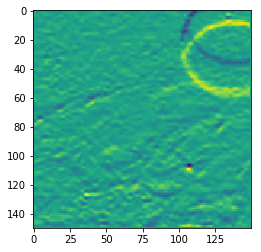

(150, 150)


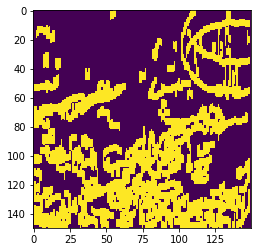

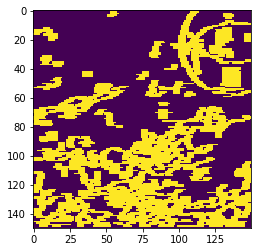

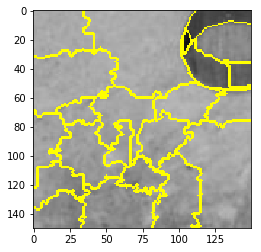

In [4]:
counter = 0
for image in objects[0]['img_Sample']:
    color_img = image
    counter += 1
    print('Sum Red')
    print(sum(sum(color_img[:, :, 0])))
    print('Sum Green')
    print(sum(sum(color_img[:, :, 1])))
    print('Sum Blue')
    print(sum(sum(color_img[:, :, 2])))
    image = color.rgb2gray(image)
    print('summed luminance')
    print(np.sum(np.sum(image)))
    edge_image = feature.canny(image, 0.2)
    v_edges = filters.sobel_v(image)
    print('Sobel V sum')
    print(sum(sum(v_edges)))
    print('Sobel H sum')
    h_edges = filters.sobel_h(image)
    print(sum(sum(h_edges)))
    print('max h edge count')
    print(np.max(np.sum(edge_image, axis=0)))
    print('max v edge count')
    print(np.max(np.sum(edge_image, axis=1)))
    print('Gabor kernal')
    gabor = filters.gabor(image, frequency=0.2)
    print(np.sum(np.sum(gabor, axis=1)))
    vert_dilation = np.array([[0, 0, 1, 0, 0],
                             [0, 0, 1, 0, 0],
                             [0, 0, 1, 0, 0],
                             [0, 0, 1, 0, 0],
                             [0, 0, 1, 0, 0]], dtype=np.uint8)
    horz_dilation = np.array([[0, 0, 0, 0, 0],
                             [0, 0, 0, 0, 0],
                             [1, 1, 1, 1, 1],
                             [0, 0, 0, 0, 0],
                             [0, 0, 0, 0, 0]], dtype=np.uint8)
    vert_img = morphology.dilation(edge_image, vert_dilation)
    horz_img = morphology.dilation(edge_image, horz_dilation)
    segmented_img = segmentation.quickshift(color_img)
    print('Dilated Vert Image')
    print(np.sum(np.sum(vert_img, axis=1)))
    print('Dilated Horz Image')
    print(np.sum(np.sum(horz_img, axis=1)))
    no_of_segments = len(np.unique(segmented_img))
    print('Segment Count')
    print(no_of_segments)
    plt.imshow(edge_image)
    plt.show()
    plt.imshow(v_edges)
    plt.show()
    plt.imshow(h_edges)
    plt.show()
    print(vert_img.shape)
    plt.imshow(vert_img)
    plt.show()
    plt.imshow(horz_img)
    plt.show()
    plt.imshow(segmentation.mark_boundaries(image, segmented_img))
    plt.show()
    # plt.imshow(gabor)
    # plt.show()
    if counter > 3:
        break

In [5]:
from core_photo_force.scripts_modules.well_core import process_image
import pandas as pd
output = []
for dataset in objects:
    table_list = []
    for idx, image in enumerate(dataset['img_Sample']):
        if idx % 10 == 0:
            print(idx/len(dataset['img_Sample']))
        temp_series = process_image(image)
        temp_series['bad_core'] = dataset['is_good'][idx]
        temp_series['is_sand'] = dataset['is_good'][idx]
        temp_series['grain_size'] = dataset['grain_size'][idx]
        if len(dataset['sed_structure_code']) > 0:
            temp_series['sed_structure_code'] = dataset['sed_structure_code'][idx]
        table_list.append(temp_series)
    table_list = pd.concat(table_list, axis=1)    
    print(table_list.T.shape)
    output.append(table_list.T)
output = pd.concat(output)
with open('feature_table.pkl', 'wb') as f:
    pickle.dump(output, f)
feature_table = output

0.0


0.1


0.2


0.3


0.4


0.5


0.6


0.7


0.8


0.9


(100, 16)
0.0


0.1


0.2


0.3


0.4


0.5


0.6


0.7


0.8


0.9


(100, 15)
0.0


0.05


0.1


0.15


0.2


0.25


0.3


0.35


0.4


0.45


0.5


0.55


0.6


0.65


0.7


0.75


0.8


0.85


0.9


0.95


(200, 16)
0.0


0.1


0.2


0.3


0.4


0.5


0.6


0.7


0.8


0.9


(100, 16)


In [7]:

objects = []
with open('feature_table.pkl', 'rb') as f:
    while True:
        try:
            objects.append(pickle.load(f))
        except EOFError:
            break
feature_table = objects[0]

feature_table.shape

(500, 16)

In [9]:
feature_table.head(5)

,Dilated Horz Image,Dilated Vert Image,Segment Count,Sobel H sum,Sobel V sum,Sum Blue,Sum Green,Sum Luminance,Sum Red,bad_core,gabor filter sum,grain_size,is_sand,max h edge count,max v edge count,sed_structure_code
0,6440,6935,28,4.8531,-17.9298,17665,17998,14473.5,18190,0,20.8953,None,0,103,35,None
1,8378,11213,30,42.9751,-25.2548,18826,19356,4428.04,17659,1,6.5328,0,1,46,60,1
2,7129,10244,30,-12.1109,3.50361,18750,19710,10182.2,19383,0,14.7061,None,0,41,56,None
3,8564,8943,22,-9.98167,-26.6821,19868,18731,13563.8,18314,0,19.7664,None,0,39,51,None
4,3954,6052,29,0.000510196,17.6159,18724,18900,3314.5,20728,1,4.56973,0,1,30,64,2


In [10]:
feature_cols = ['Dilated Horz Image', 'Dilated Vert Image', 'Segment Count',
       'Sobel H sum', 'Sobel V sum', 'Sum Blue', 'Sum Green', 'Sum Luminance',
       'Sum Red', 'max h edge count', 'max v edge count']
y_cols =  ['bad_core', 'grain_size', 'is_sand', 'sed_structure_code']

x_table = feature_table[feature_cols]
y_table = feature_table[y_cols]

ValueError: color kwarg must have one color per dataset

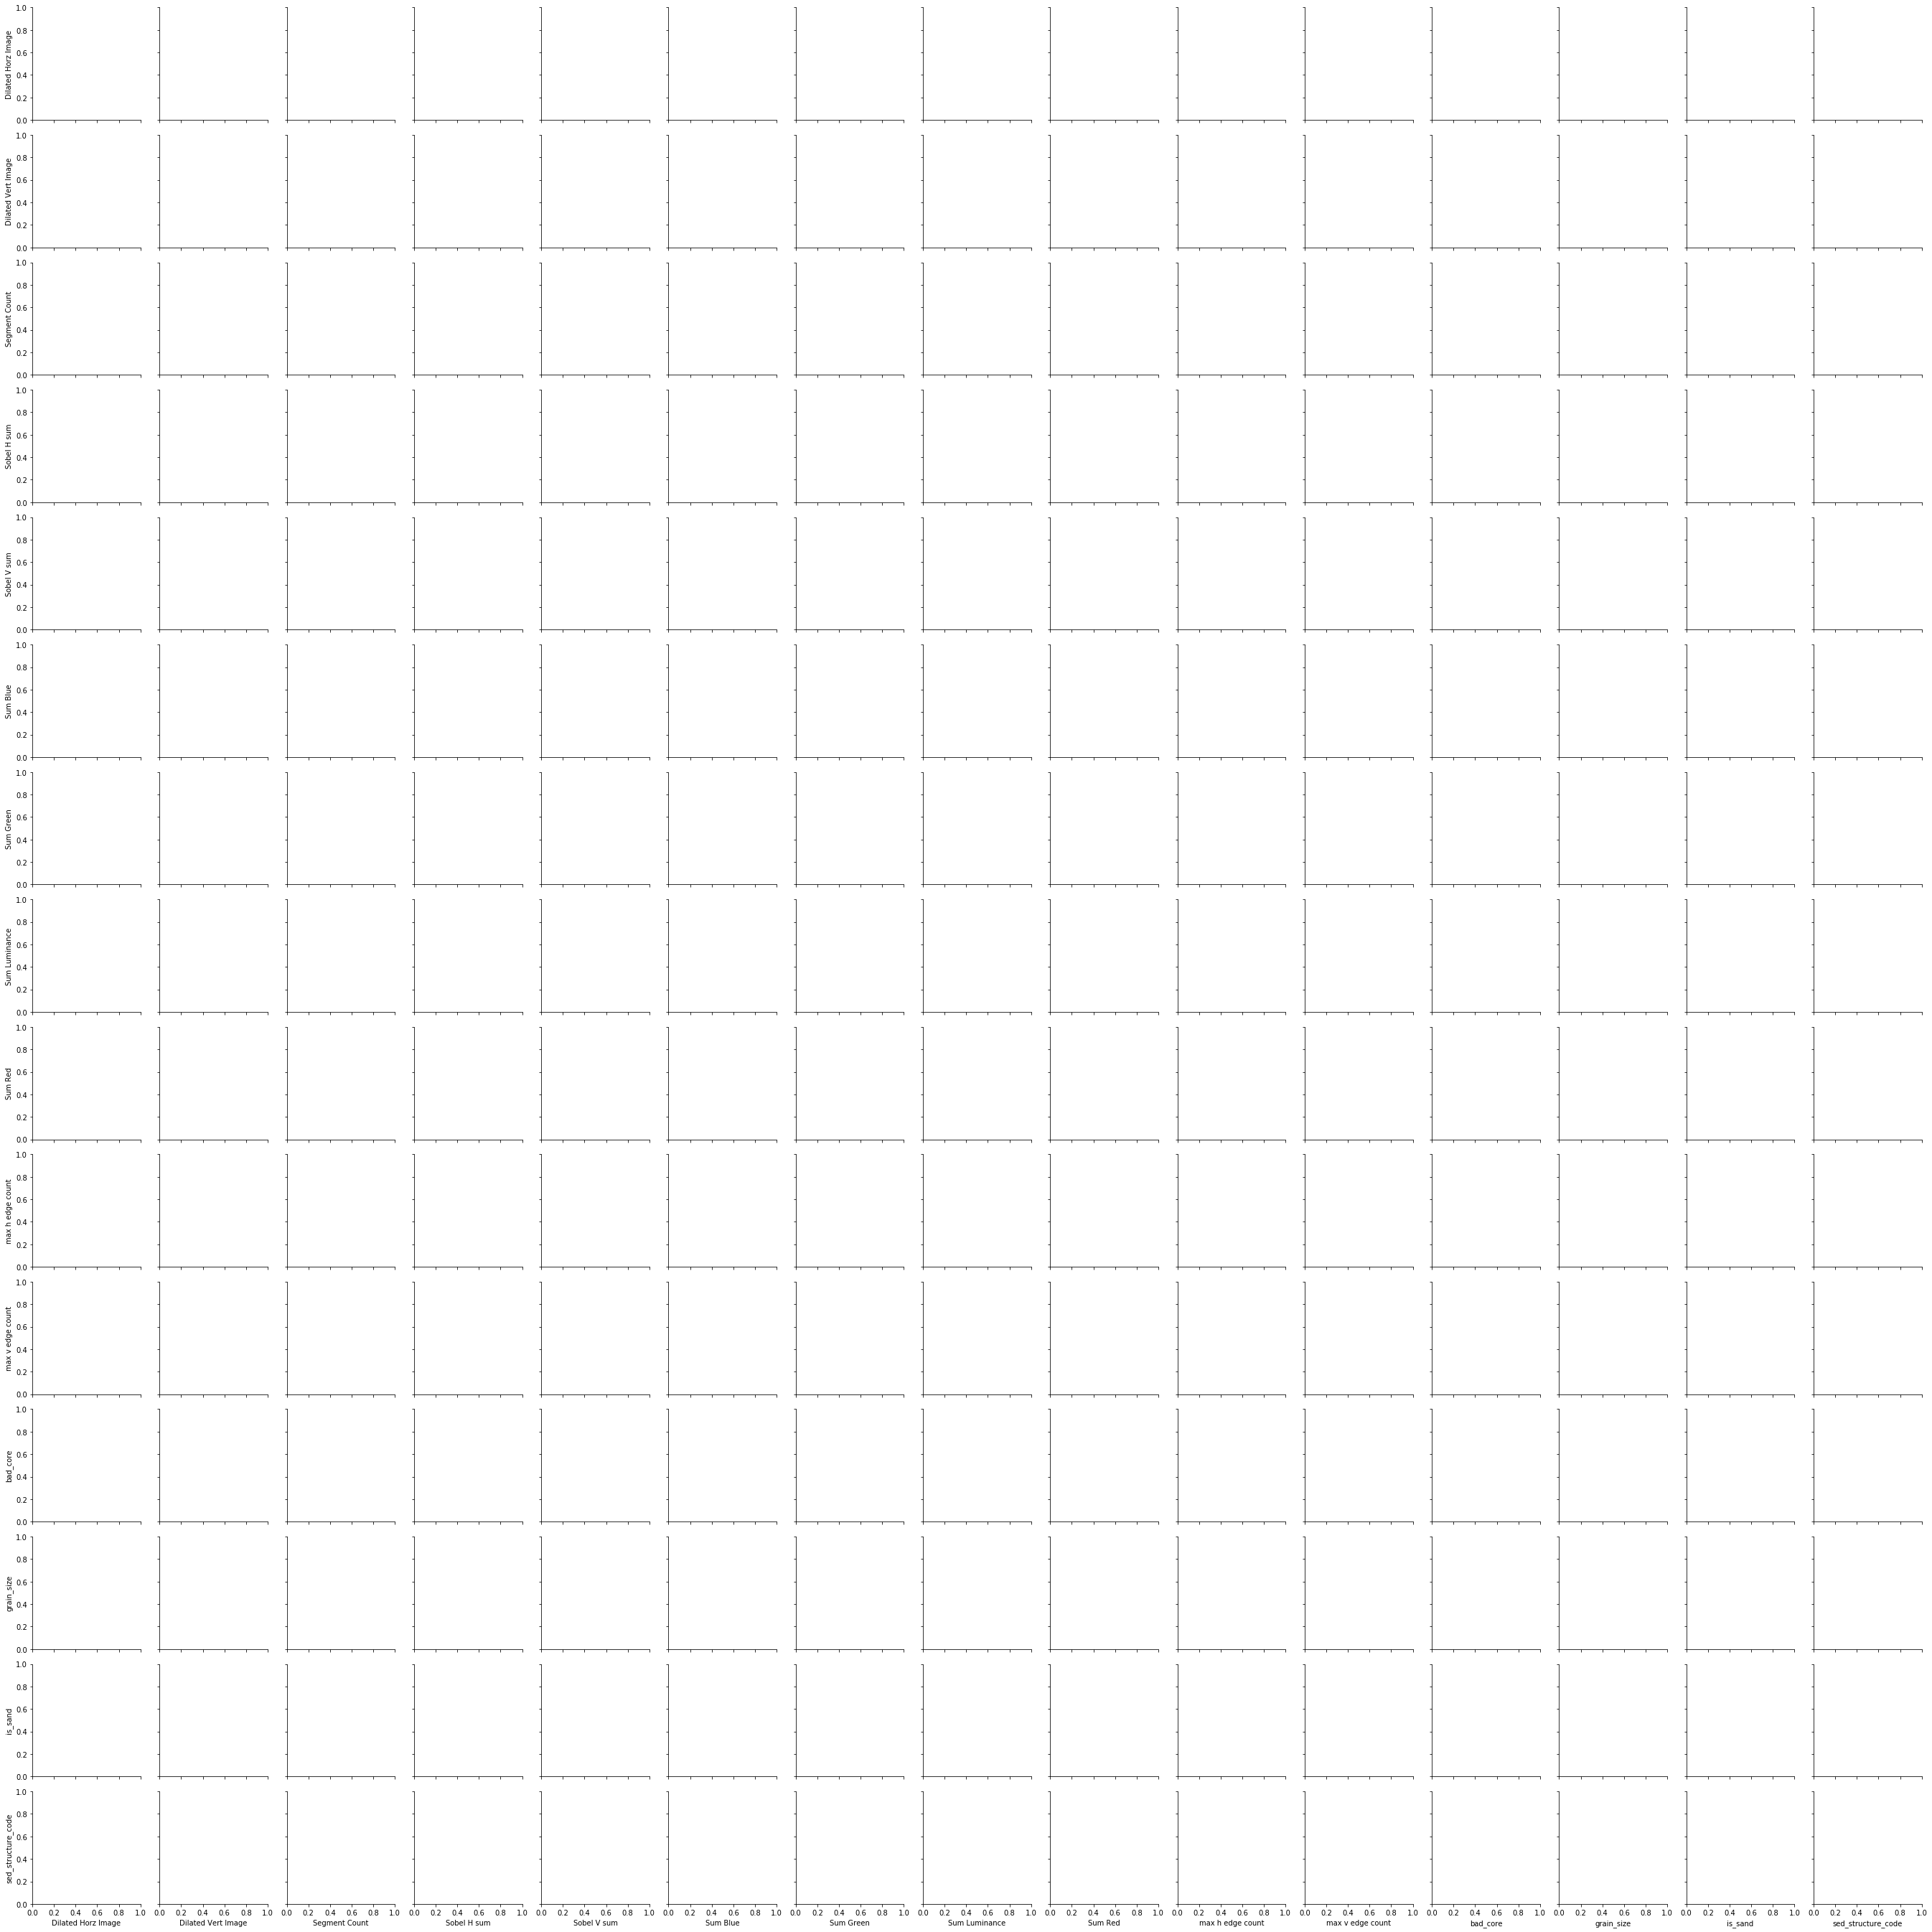

In [11]:
import seaborn as sns

sns.pairplot(feature_table[feature_cols + y_cols])

In [13]:
from sklearn import preprocessing, model_selection

X_train, X_test, y_train, y_test =  model_selection.train_test_split(x_table, y_table)

scaler = preprocessing.RobustScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train.iloc[:, 0])
y_pred_train = model.predict(X_train)
print(accuracy_score(y_pred_train, y_train.iloc[:, 0]))
y_pred_test = model.predict(X_test)
print(accuracy_score(y_pred_test, y_test.iloc[:, 0]))
print(y_pred_train)

1.0
0.896
['1' '0' '0' '1' '0' '0' '1' '0' '1' '0' '0' '0' '1' '1' '1' '1' '1' '0'
 '0' '1' '1' '1' '1' '1' '1' '0' '1' '1' '0' '0' '0' '0' '1' '1' '1' '1'
 '0' '1' '1' '0' '0' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '0' '1' '0'
 '1' '0' '1' '0' '0' '0' '0' '1' '1' '1' '0' '1' '1' '0' '1' '1' '1' '0'
 '0' '0' '1' '0' '1' '1' '1' '1' '1' '0' '0' '0' '1' '1' '0' '0' '0' '0'
 '1' '1' '1' '1' '1' '0' '0' '0' '1' '1' '1' '1' '1' '0' '0' '1' '1' '1'
 '1' '1' '1' '0' '0' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '0'
 '1' '0' '1' '1' '0' '1' '0' '0' '0' '1' '0' '1' '1' '0' '0' '1' '0' '1'
 '1' '0' '1' '1' '1' '1' '0' '1' '0' '1' '0' '1' '1' '1' '0' '1' '1' '1'
 '1' '0' '1' '1' '0' '0' '0' '0' '1' '1' '1' '1' '0' '1' '0' '1' '1' '0'
 '0' '1' '1' '1' '0' '1' '0' '1' '1' '1' '0' '0' '1' '1' '1' '0' '1' '0'
 '0' '1' '0' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '0' '1' '1' '0' '1'
 '0' '0' '1' '0' '0' '1' '1' '1' '0' '1' '0' '0' '1' '0' '1' '1' '1' '1'
 '0' '1' '0' '1' '1' '1' '1' '1' '0' '1' 

In [61]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

na_filter = ~y_train.iloc[:, 1].isna()
sand_y_train = y_train[na_filter]

sand_y_train = sand_y_train.iloc[:, 1]
sand_y_train= pd.to_numeric(sand_y_train)
# str_filter = sand_y_train.str.isnumeric()
# print(test)
# print(sand_y_train)
# print(sand_y_train.dtype)
# print(X_train[na_filter].shape)

X_train_sand = X_train[na_filter]
print(X_train_sand.shape)
# model2 = RandomForestClassifier(n_estimators=100)
model2 = SVC(kernel='poly')
model2.fit(X_train_sand, sand_y_train)
y_sand_pred_train = model2.predict(X_train[na_filter])
print(accuracy_score(y_sand_pred_train,sand_y_train))
na_filter = ~y_test.iloc[:,1].isna()
sand_y_test = y_test[na_filter]
sand_y_test = sand_y_test.iloc[:, 1]
sand_y_test = pd.to_numeric(sand_y_test)
y_sand_pred_test = model2.predict(X_test[na_filter])
print(accuracy_score(y_sand_pred_test, sand_y_test))

(234, 11)
0.423076923077
0.37037037037
